In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Gaelim/Mall-Customer-Segmentation/main/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df["Gender"] = df["Gender"].astype("category" )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


**Univariate Analysis**

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


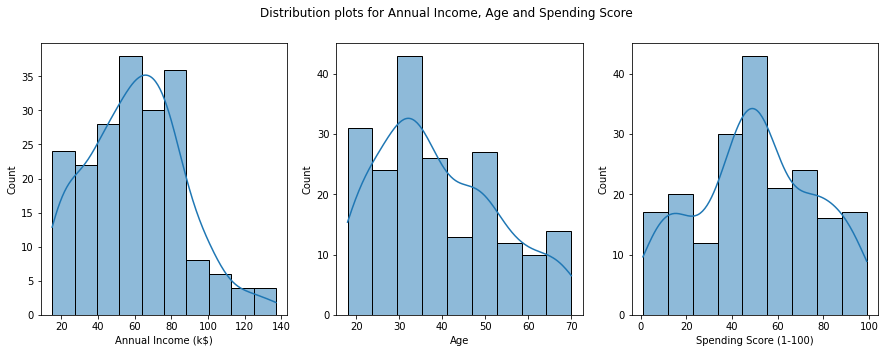

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))

sns.histplot(data = df, x = "Annual Income (k$)", kde=True, ax = ax1)
sns.histplot(data = df, x = "Age", kde=True, ax = ax2)
sns.histplot(data = df, x = "Spending Score (1-100)", kde=True, ax = ax3)
fig.suptitle('Distribution plots for Annual Income, Age and Spending Score')
plt.show()

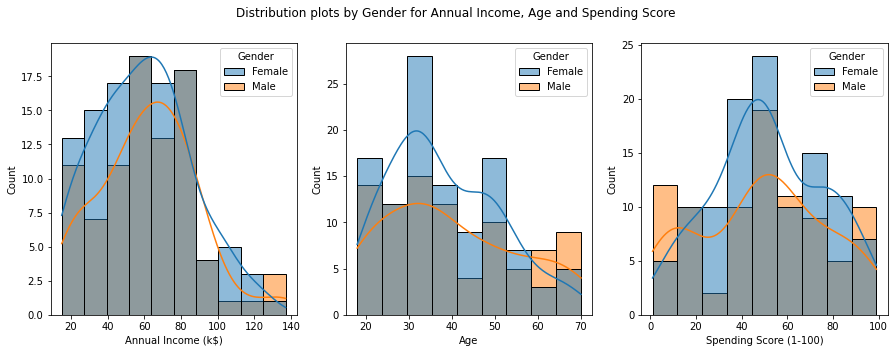

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))

sns.histplot(data = df, x = "Annual Income (k$)", kde=True, hue="Gender", ax = ax1)
sns.histplot(data = df, x = "Age", kde=True, hue="Gender", ax = ax2)
sns.histplot(data = df, x = "Spending Score (1-100)", kde=True, hue="Gender", ax = ax3)
fig.suptitle('Distribution plots by Gender for Annual Income, Age and Spending Score')
plt.show()

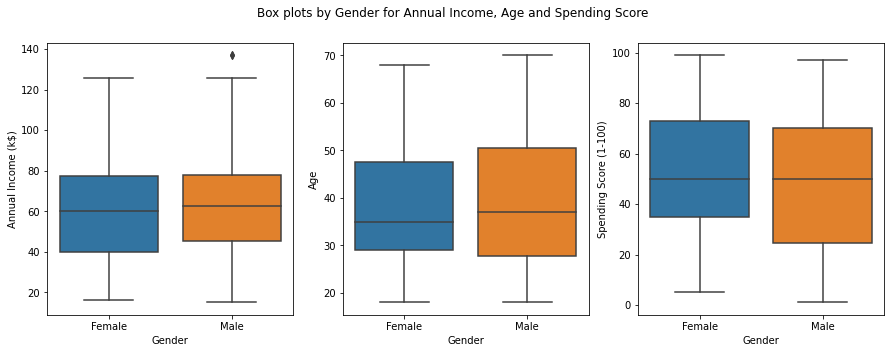

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))

sns.boxplot(data = df, x = "Gender", y = "Annual Income (k$)", ax = ax1)
sns.boxplot(data = df, x = "Gender",y = "Age", ax = ax2)
sns.boxplot(data = df, x = "Gender",y = "Spending Score (1-100)", ax = ax3)
fig.suptitle('Box plots by Gender for Annual Income, Age and Spending Score')
plt.show()

In [10]:
df["Gender"].value_counts(normalize= True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

**Bivariate Analysis**

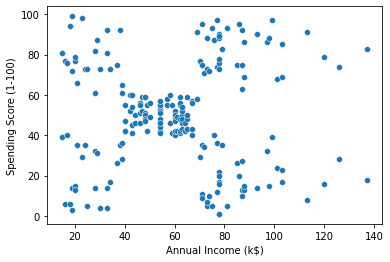

In [11]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)");

In [12]:
df.drop("CustomerID", inplace = True, axis = 1)

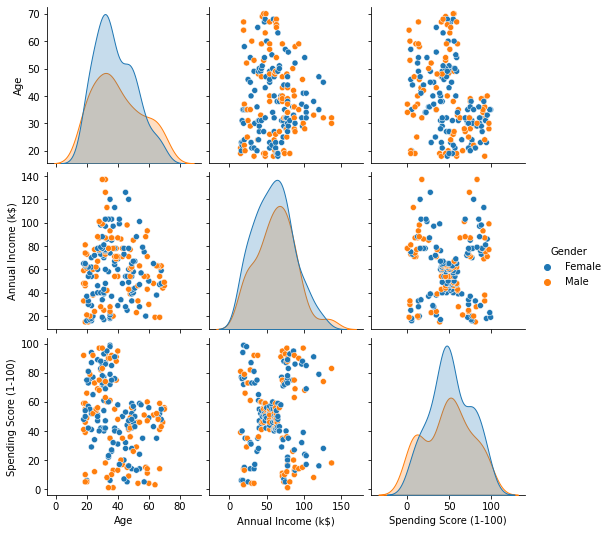

In [13]:
sns.pairplot(df, hue = "Gender");

In [14]:
df.groupby("Gender")[df.select_dtypes(include = "number").columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


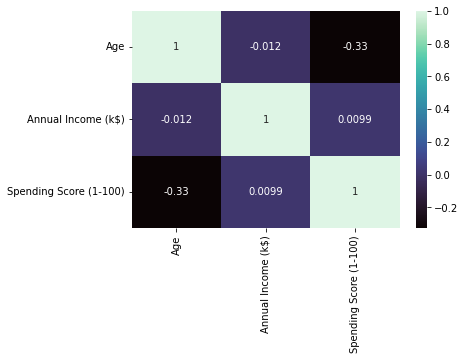

In [15]:
sns.heatmap(df.corr(), annot = True, cmap = "mako");

**Univariate, bivariate and multivarate clustering**

In [16]:
clust = KMeans()
clust.fit(df[["Annual Income (k$)"]])

KMeans()

In [17]:
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [18]:
df["Income Cluster"] = clust.labels_

In [19]:
df.groupby("Income Cluster")["Annual Income (k$)"].mean()

Income Cluster
0     22.000000
1     75.095238
2     50.428571
3    102.000000
4    127.666667
5     38.846154
6     62.111111
7     87.625000
Name: Annual Income (k$), dtype: float64

In [20]:
df["Income Cluster"].value_counts().sort_index()

0    32
1    42
2    28
3    14
4     6
5    26
6    36
7    16
Name: Income Cluster, dtype: int64

In [21]:
#Elbow Method to find the correct number of clusters
inertia_scores = []
for i in range(1,11):
    clust =  KMeans(n_clusters = i,random_state = 10)
    clust.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(clust.inertia_)
    

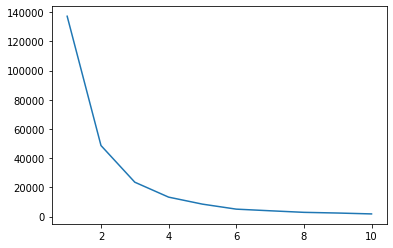

In [22]:
plt.plot(range(1,11), inertia_scores);

In [23]:
clust =  KMeans(n_clusters = 3,random_state = 10)
clust.fit(df[["Annual Income (k$)"]])
df["Income Cluster"] = clust.labels_

In [24]:
df["Income Cluster"].value_counts().sort_index()

0    74
1    90
2    36
Name: Income Cluster, dtype: int64

In [25]:
df.groupby("Income Cluster")["Annual Income (k$)"].mean()

Income Cluster
0    33.486486
1    67.088889
2    99.888889
Name: Annual Income (k$), dtype: float64

In [26]:
#Elbow Method to find the correct number of clusters
inertia_scores = []
for i in range(1,11):
    clust =  KMeans(n_clusters = i,random_state = 10)
    clust.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores.append(clust.inertia_)

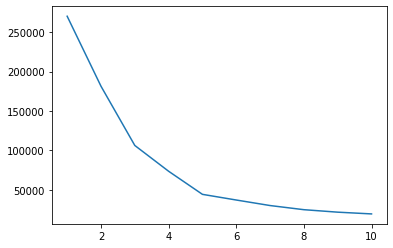

In [27]:
plt.plot(range(1,11), inertia_scores);

In [28]:
clust =  KMeans(n_clusters = 5,random_state = 10)
clust.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans(n_clusters=5, random_state=10)

In [29]:
df["Income & Spending Score Cluster"] = clust.labels_

In [30]:
df.groupby("Income & Spending Score Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()

,Annual Income (k$),Spending Score (1-100),Age
Income & Spending Score Cluster,,,
0,25.727273,79.363636,25.272727
1,55.296296,49.518519,42.716049
2,86.538462,82.128205,32.692308
3,26.304348,20.913043,45.217391
4,88.200000,17.114286,41.114286


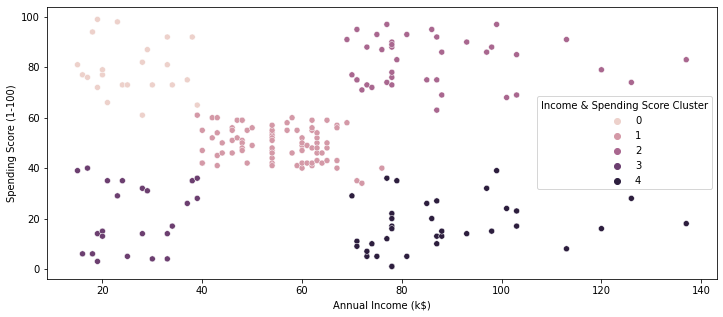

In [31]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x= "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Income & Spending Score Cluster");

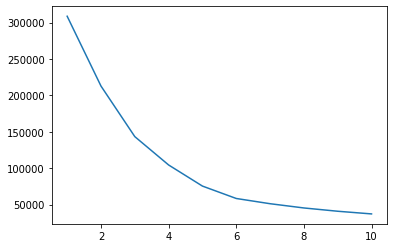

In [32]:
#Elbow Method to find the correct number of clusters
inertia_scores = []
for i in range(1,11):
    clust =  KMeans(n_clusters = i,random_state = 10)
    clust.fit(df[["Annual Income (k$)", "Spending Score (1-100)", "Age"]])
    inertia_scores.append(clust.inertia_)
    
plt.plot(range(1,11), inertia_scores);

In [33]:
clust =  KMeans(n_clusters = 5,random_state = 10)
clust.fit(df[["Annual Income (k$)", "Spending Score (1-100)", "Age"]])
df["multivariate Cluster"] = clust.labels_

In [34]:
df.groupby("multivariate Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()

,Annual Income (k$),Spending Score (1-100),Age
multivariate Cluster,,,
0,26.304348,78.565217,25.521739
1,55.291139,49.569620,43.088608
2,86.538462,82.128205,32.692308
3,26.304348,20.913043,45.217391
4,87.750000,17.583333,40.666667
